# Î™©Ï∞®
## 1. LMS Îî∞ÎùºÌïòÍ∏∞_Í∏∞Î≥∏
## 2. LMS Îî∞ÎùºÌïòÍ∏∞_Îû≠ÌÇπ ÏóÖ!
## 3. ÌîÑÎ°úÏ†ùÌä∏_Î¶¨ÎçîÎ≥¥Îìú ÎèÑÏ†Ñ.

***
# 1. LMS Îî∞ÎùºÌïòÍ∏∞

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [10]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [11]:
# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÎùºÎ≤® ÏòÆÍ≤® ÎÜìÍ≥† Ï†úÍ±∞ÌïòÍ∏∞.
y = data['price']

del data['price']

In [12]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌÉêÏÉâÌïòÍ∏∞ ÏúÑÌï¥, ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ìï©ÏπúÎã§.
train_len = len(data) #ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Îßå Îî∞Î°ú Î∂ÑÎ¶¨Ìï†Ïàò ÏûàÍ≤å Í∏∏Ïù¥Î•º Ï†ÄÏû•ÌïòÏó¨ Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©ÌïúÎã§.
data = pd.concat((data, sub), axis=0)

In [13]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

<AxesSubplot:>

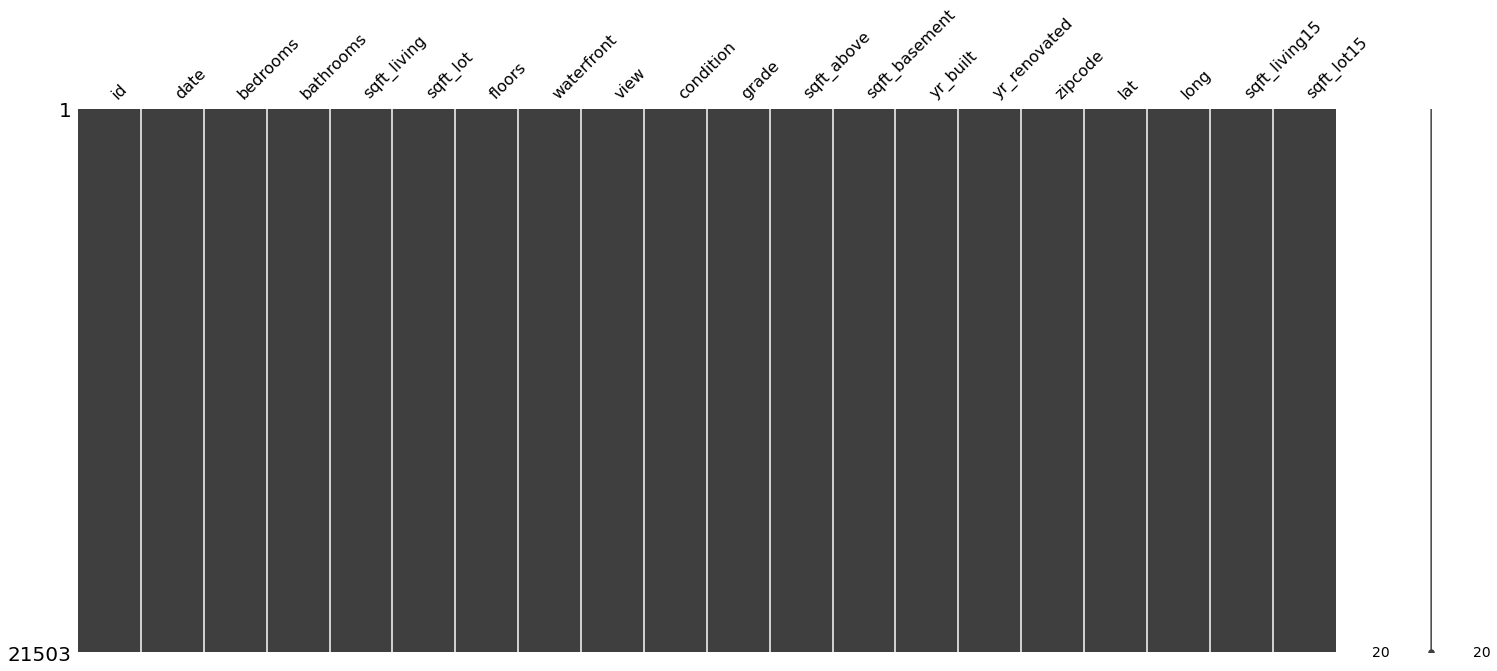

In [14]:
msno.matrix(data)

Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>

In [ ]:
loc : ÎùºÎ≤®Í∞í Í∏∞Î∞òÏùò 2Ï∞®Ïõê Ïù∏Îç±Ïã±
iloc : ÏàúÏÑúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ï†ïÏàò Í∏∞Î∞òÏùò 2Ï∞®Ïõê Ïù∏Îç±Ïã±
df.loc[Ìñâ Ïù∏Îç±Ïã±Í∞í, Ïó¥ Ïù∏Îç±Ïã±Í∞í]


In [16]:
null_check = pd.isnull(data['id'])
print(null_check) # T F Ïùò df Í∞Ä Ï∂úÎ†•ÎêúÎã§.

0       False
1       False
2       False
3       False
4       False
        ...  
6463    False
6464    False
6465    False
6466    False
6467    False
Name: id, Length: 21503, dtype: bool


In [17]:
# 2. Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞Îßå ÎΩëÏïÑ ÎÇ∏Îã§.
null_data = data.loc[null_check,'id'] # 
null_data.head()

Series([], Name: id, dtype: int64)

In [18]:
# 3. Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º ÏÑºÎã§.
print('{}: {}'.format('id', len(null_data.values)))

id: 0


In [19]:
# 4. ÌïúÎ≤àÏóê ÏûëÏÑ±
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

id : 0


In [20]:
# Î™®Îì† Ïª¨ÎüºÏóê Ï†ÅÏö©
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [21]:
sub_id = data['id'][train_len:] # ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ ÏïÑÏù¥Îîî Î∫¥ÎÜìÍ∏∞
del data['id'] # id ÏßÄÏö∞Í∏∞
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str) # data Ïó∞Ïõî Îßå Í≥†Î†§, Î≤îÏ£ºÌòïÏúºÎ°ú Î∞îÍæ∏Í∏∞

In [23]:
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

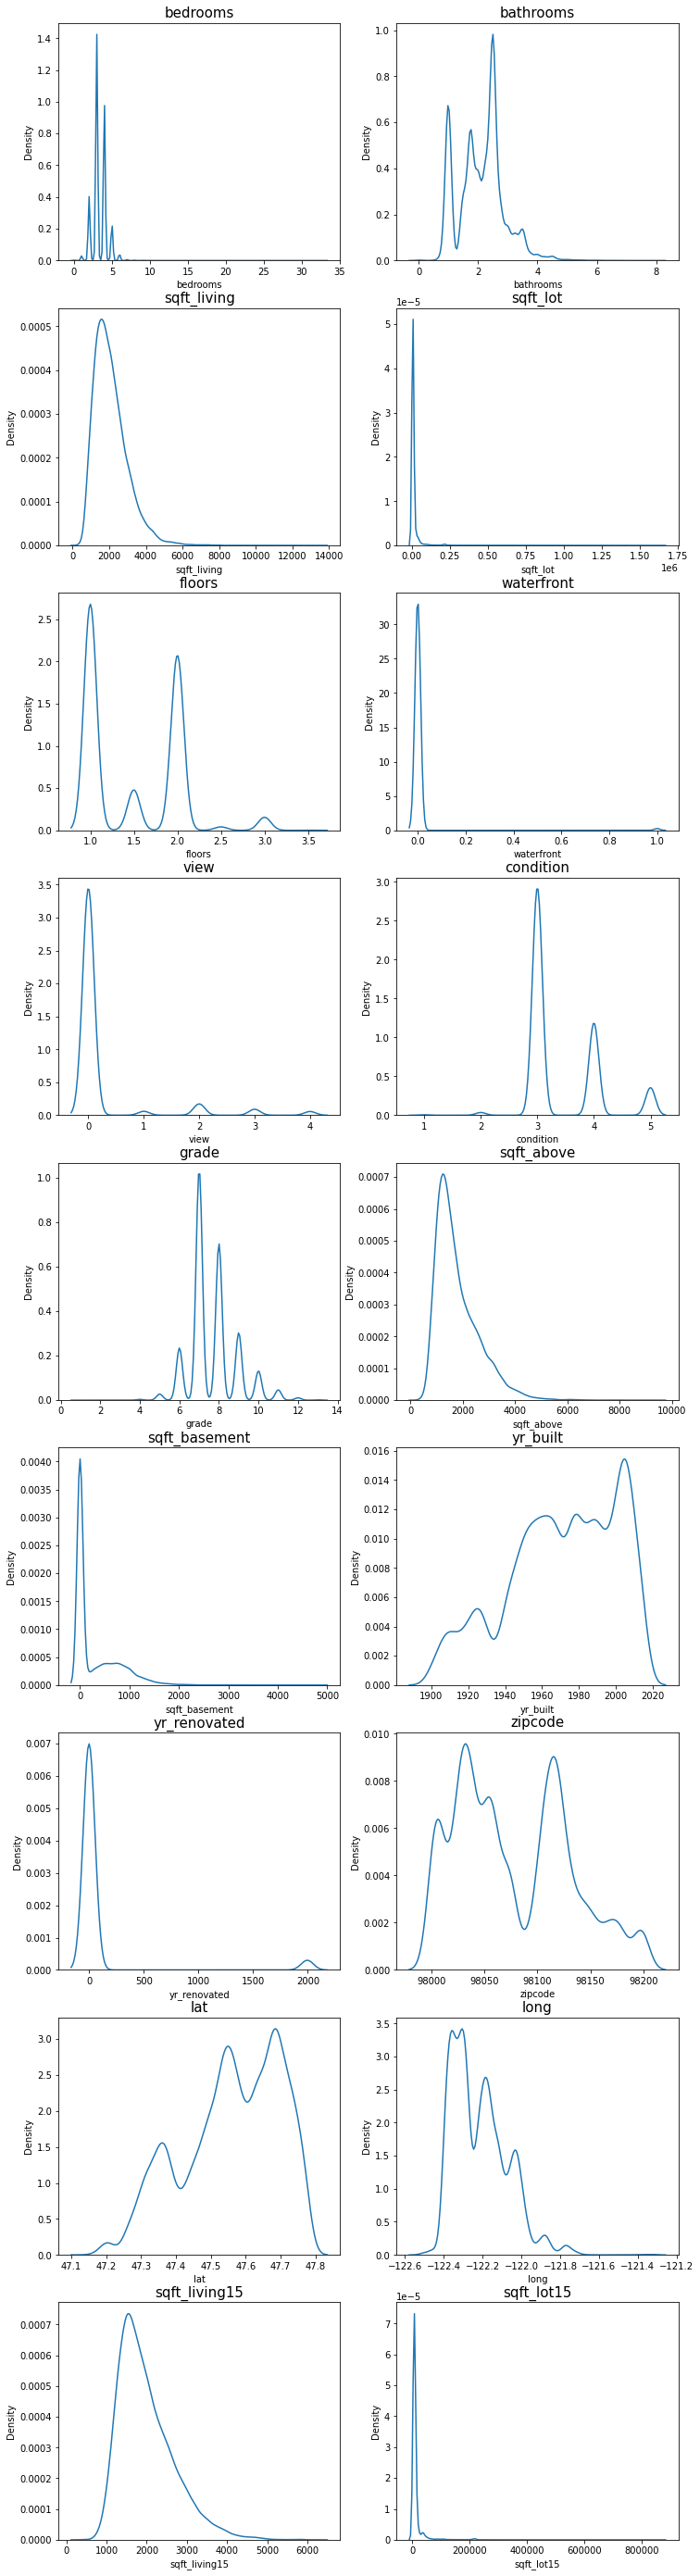

In [27]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî. 

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [31]:
# ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Îäî Ïª¨ÎüºÏóê ÎåÄÌï¥ÏÑú log scaling
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

print('Ïñçüí¢')

Ïñçüí¢


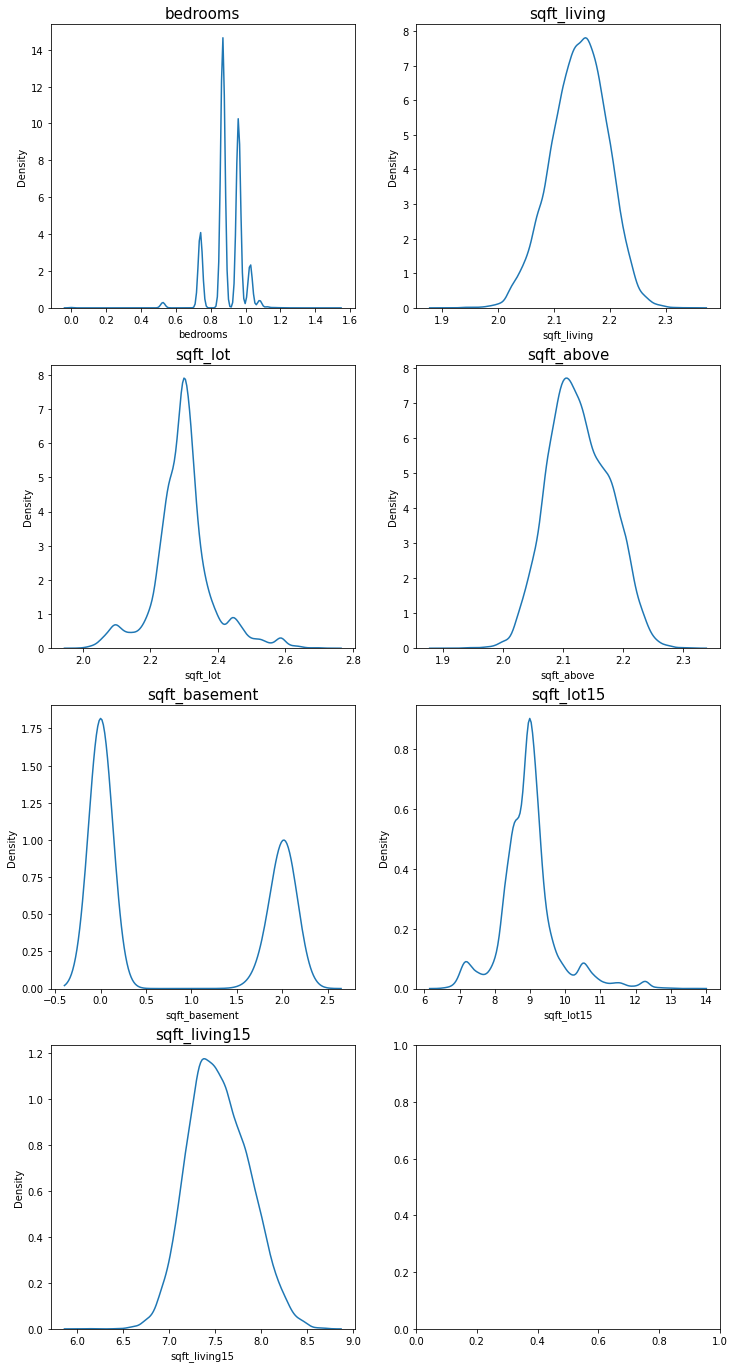

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [33]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ÏôÑÎ£å, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÎÇòÎàÑÏûê.
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [34]:
# Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ 3Í∞ÄÏßÄ ÏÇ¨Ïö©
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [35]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('Ïñçüí¢')

Ïñçüí¢


In [36]:
get_cv_score(models) # Í≤∞Ï†ïÍ≥ÑÏàòÎ•º Î∞òÌôòÌïúÎã§.

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [37]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : # Í∞Å Î™®Îç∏ ÌïôÏäµ.
        m['model'].fit(x.values, y)
    
    # ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1) # ÏòàÏ∏°Í∞í ÌèâÍ∑†ÏùÑÎ∞òÌôò.

In [38]:
y_pred = AveragingBlending(models, x, y, sub)

In [40]:
y_pred

array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

In [41]:
# Ï†úÏ∂úÌï† ÏÉòÌîå ÌååÏùº ÌôïÏù∏
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [ ]:
# Ï†úÏ∂úÌï† ÏÉòÌîå ÌååÏùº ÌôïÏù∏
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

In [42]:
# id ÏôÄ price Î°ú Ï†úÏ∂úÌï† df ÎßåÎì§Ïñ¥Ï£ºÍ∏∞
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

id         price
0  15035  5.299667e+05
1  15036  4.307262e+05
2  15037  1.361677e+06
3  15038  3.338036e+05
4  15039  3.089006e+05

In [43]:
# Ï†úÏ∂úÌï† ÌååÏùº Ï†ÄÏû•ÌïòÍ∏∞
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission.csv


#### Ï†úÏ∂ú Í≤∞Í≥º
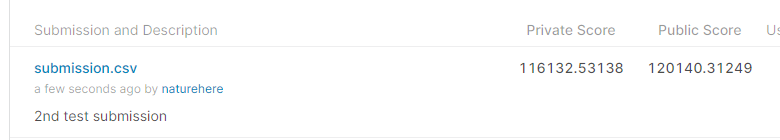

Í∑∏ÎÉ• LMS ÏΩîÎìúÎßå Îî∞ÎùºÌïú Í≤ΩÏö∞ private score 11Îßå6Ï≤ú Ï†ïÎèÑ ÎÇòÏò®Îã§.


# 2. LMS Îî∞ÎùºÌïòÍ∏∞_Îû≠ÌÇπ ÏóÖ!

In [44]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏúºÎ°ú ÏÑ±Îä•ÏùÑ Ïò¨Î†§Î≥¥Ïûê.

In [95]:
# Îã§Ïãú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò§Ïûê.
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [46]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [96]:
# date Î•º Ï†ïÏàòÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ï≤òÎ¶¨. ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÌäπÏÑ±ÏúºÎ°ú ÌôúÏö©ÌïòÏûê.
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [97]:
# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ price Ïª¨Îüº.
# yÏóê  price ÎÑ£Í≥†, trainÏóêÏÑú ÏÇ≠Ï†ú

y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [98]:
# id Ïª¨Îüº ÏÇ≠Ï†ú
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [99]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâ.

test['date'] = test['date'].apply(lambda i : i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [51]:
# y ÌôïÏù∏
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

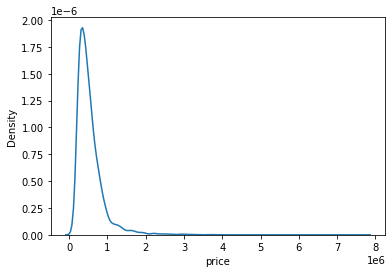

In [52]:
# Í∞ÄÍ≤© Î∂ÑÌè¨ ÌôïÏù∏
sns.kdeplot(y)
plt.show()

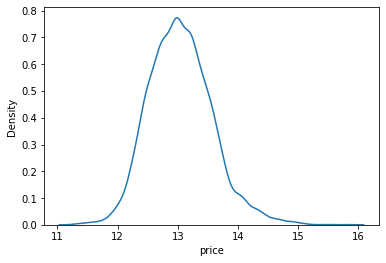

In [100]:
# Í∞ÄÍ≤© Î∂ÑÌè¨Í∞Ä ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú ÌòïÌÉú.
# np.log1p() Î°ú Î°úÍ∑∏ Î≥ÄÌôò ÌïòÍ≥†, Î™®Îç∏Í∞í ÏòàÏ∏°ÌõÑ, np.expm1()ÏúºÎ°ú ÎêòÎèåÎ¶¨Ïûê.
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [55]:
# Î™®Îëê Ïã§Ïàò, Ï†ïÏàòÌòï ÏûêÎ£åÏù¥ÎØÄÎ°ú ÌïôÏäµÏóê ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎã§.

In [58]:
# Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÏúÑÌï¥ Ìï®ÏàòÎ°ú ÎßåÎì§Ïñ¥ Ïì∞Ïûê.

# RMSE Í≥ÑÏÇ∞ Ìï®Ïàò 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [ ]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

In [59]:
# XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor ÎÑ§ Í∞ÄÏßÄ Î™®Îç∏ ÏùÑ ÏÇ¨Ïö©ÌïòÏûê.
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [60]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Ïãú, random_state ÏßÄÏ†ïÍ∞ÄÎä•, None ÏúºÎ°ú ÎÇ®Í≤®ÎëêÎ©¥ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïù¥ Îã¨ÎùºÏßê.ÌïôÏäµÍ≤∞Í≥ºÎèÑ Îã¨ÎùºÏßê.
# Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú ÏÑ±Îä•Ïù¥ Í∞úÏÑ† ÎêòÎäîÏßÄ Í≤ÄÏ¶ùÌïòÎ†§Ìï®.
# Ïñ¥Îñ§ ÏãúÎèÑÍ∞Ä Î™®Îç∏ÏÑ±Îä•Ïóê Í∏çÏ†ïÏ†ÅÏù∏ÏßÄ ÌåêÎã®ÌïòÍ∏∞ÏúÑÌï¥, ÎûúÎç§ÏöîÏÜåÎ°ú ÏÉùÍ∏∞Îäî Î∂àÌôïÏã§ÏÑ±ÏùÑ Ï†úÍ±∞ÌïòÏûê.
# Îî∞ÎùºÏÑú random_state Î•º ÌäπÏ†ï Í∞íÏúºÎ°ú Í≥†Ï†ïÌïúÎã§.
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§. 

random_state=2020

#  Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±ÌõÑ models Ïóê ÎÑ£Ïñ¥Ï§ÄÎã§.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [61]:
# Í∞ÅÎ™®Îç∏Ïùò ÏÜçÏÑ±Ïóê Ï†ëÍ∏àÌïòÏó¨ Ïù¥Î¶ÑÏùÑ ÏñªÎäî Î≤ï.
gboost.__class__.__name__

'GradientBoostingRegressor'

In [62]:
# Ïù¥Î¶ÑÏúºÎ°ú Ï†ëÍ∑ºÌïòÏó¨ forÎ¨∏ÏóêÏÑú Î™®Îç∏ Î≥Ñ ÌïôÏäµ Î∞è ÏòàÏ∏°
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [64]:
# Ï†êÏàò Ìï®Ïàò

def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

In [65]:
get_scores(models, train, y)

RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125487.071025
LGBMRegressor              111920.367359
XGBRegressor               110318.669566

In [67]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
#Í∑∏Î¶¨Îìú ÌÉêÏÉâÌïòÏûê
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCVÏóê ÏûÖÎ†•ÎêòÎäî Ïù∏Ïûê

param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.)
n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

In [68]:
#xgboost Í∑∏Î¶¨Îìú ÏÑúÏπò ÌååÎùºÎØ∏ÌÑ∞
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [69]:
# Î™®Îç∏ lgbm
model = LGBMRegressor(random_state=random_state)

In [70]:
# Í∑∏Î¶¨Îìú Î™®Îç∏ Ï¥àÍ∏∞Ìôî
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [71]:
# Í≤∞Í≥º ÌôïÏù∏
grid_model.cv_results_

{'mean_fit_time': array([0.15500956, 0.24077687, 0.47121534, 0.46575947]),
 'std_fit_time': array([0.04361463, 0.07408812, 0.18231991, 0.09332462]),
 'mean_score_time': array([0.0111515 , 0.01678677, 0.02936125, 0.02810545]),
 'std_score_time': array([0.00821054, 0.00811943, 0.01682038, 0.00314397]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [72]:
# ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÄ params, Í∞ÅÍ∞ÅÏóê ÎåÄÌïú ÌÖåÏä§Ìä∏ Ï†êÏàòÎäî mean_test_score Ïóê ÏûàÎã§.
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [73]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [74]:
# df Î°ú ÌôïÏù∏
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [76]:
# ÏïûÏÑú neg_mean_squared_errorÎ•º ÏÇ¨Ïö©ÌñàÎã§.
# RMSE Î•º Î≥¥Ïûê
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [77]:
# ÏïûÏÑú logÎ≥ÄÌôòÎêòÏóàÎã§.
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [78]:
#`RMSLE`Í∞Ä ÎÇÆÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [79]:
# Í∑∏Î¶¨Ïä§ ÏÑúÏπò Ï†ÑÏ≤¥Î•º Ìï®ÏàòÎ°ú ÎßåÎì§Ïûê
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûÖÎ†•
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [80]:
# ÏúÑ Ìï®ÏàòÎ°ú Í∑∏Î¶¨Îìú ÏÑúÏπò ÌïòÏûê
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [83]:
# Í∞ÄÏû• Ï¢ãÏùÄ 10, 100ÏúºÎ°ú Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌïòÍ≥†, ÌïôÏäµ ÏòàÏ∏°ÌïòÏó¨ Í≤∞Í≥ºÎ•º Î≥¥Ïûê.
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction = np.expm1(prediction) #ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú ÎèåÎ¶¨Í∏∞
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [84]:
# Ï†úÏ∂úÌïòÍ∏∞ÏúÑÌï¥ ÏÉòÌîå csv Í∞ÄÏ†∏Ïò§Í∏∞
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [85]:
# ÏòàÏ∏°Í∞í ÎçÆÍ∏∞
submission['price'] = prediction
submission.head()

id         price
0  15035  5.067667e+05
1  15036  4.795061e+05
2  15037  1.345155e+06
3  15038  3.122579e+05
4  15039  3.338645e+05

In [86]:
# csv Î°ú Ï†ÄÏû•ÌïòÍ∏∞
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.5s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.5s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END ......................max

In [ ]:
## ÏúÑ Í≥ºÏ†ïÎèÑ Ìï®ÏàòÌôî ÌïòÏûê
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûëÏÑ±
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [ ]:
# ÌïôÏäµ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•ÏùÑ Ìï®ÏàòÎ°ú ÌïúÎ≤àÏóê
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

Í∑∏Î¶¨Îìú ÏÑúÏπòÌïú lgbmÎ™®Îç∏ Ï†úÏ∂ú, private score  11Îßå 5Ï≤úÏ†ê
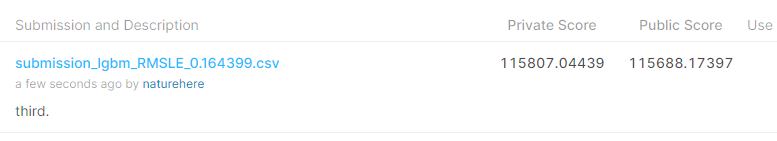

# 3. ÌîÑÎ°úÏ†ùÌä∏_Î¶¨ÎçîÎ≥¥Îìú ÎèÑÏ†Ñ.

***
ÏãúÎèÑÌï¥ Î≥ºÎßåÌïú Í≤ÉÎì§.
- EDA Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ.
- ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
- Í∑∏Î¶¨Îìú ÏÑúÏπò, ÏµúÏ†ÅÏùò Ï°∞Ìï© Ï∞æÍ∏∞
- Î∏îÎ†åÎî© Î∞©Î≤ï ÌôúÏö©ÌïòÍ∏∞.
***

In [87]:
# ÏïûÏÑ†, Í∑∏Î¶¨Îìú ÏÑúÏπò Í≥ºÏ†ïÏóêÏÑú, Ìé∏Ìñ•Îêú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú logÏ†ÅÏö© Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÏïòÎã§.
train.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

In [88]:
test

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201412         3       2.25         2570      7242     2.0           0   
1     201412         4       3.00         1960      5000     1.0           0   
2     201405         4       4.50         5420    101930     1.0           0   
3     201504         3       1.00         1780      7470     1.0           0   
4     201503         3       2.50         1890      6560     2.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406         3       1.75         1500     11968     1.0           0   
6464  201501         3       2.00         1490      1126     3.0           0   
6465  201502         3       2.50         1310      1294     2.0           0   
6466  201406         2       0.75         1020      1350     2.0           0   
6467  201501         3       2.50         1600      2388     2.0           0   

      view  condition  grade  sqft_above  sqft_basement  yr_built  \
0        0          3      7        2170            400      1951   
1        0          5      7        1050            910      1965   
2        0          3     11        3890           1530      2001   
3        0          3      7        1050            730      1960   
4        0          3      7        1890              0      2003   
...    ...        ...    ...         ...            ...       ...   
6463     0          3      6        1500              0      2014   
6464     0          3      8        1490              0      2014   
6465     0          3      8        1180            130      2008   
6466     0          3      7        1020              0      2009   
6467     0          3      8        1600              0      2004   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             1991    98125  47.7210 -122.319           1690        7639  
1                0    98136  47.5208 -122.393           1360        5000  
2                0    98053  47.6561 -122.005           4760      101930  
3                0    98146  47.5123 -122.337           1780        8113  
4                0    98038  47.3684 -122.031           2390        7570  
...            ...      ...      ...      ...            ...         ...  
6463             0    98010  47.3095 -122.002           1320       11303  
6464             0    98144  47.5699 -122.288           1400        1230  
6465             0    98116  47.5773 -122.409           1330        1265  
6466             0    98144  47.5944 -122.299           1020        2007  
6467             0    98027  47.5345 -122.069           1410        1287  

[6468 rows x 19 columns]

In [89]:
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

In [101]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌÉêÏÉâÌïòÍ∏∞ ÏúÑÌï¥, ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ìï©ÏπúÎã§.
train_len = len(train) #ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Îßå Îî∞Î°ú Î∂ÑÎ¶¨Ìï†Ïàò ÏûàÍ≤å Í∏∏Ïù¥Î•º Ï†ÄÏû•ÌïòÏó¨ Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©ÌïúÎã§.
data = pd.concat((train, test), axis=0)

In [102]:
# ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Îäî Ïª¨ÎüºÏóê ÎåÄÌï¥ÏÑú log scaling
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

In [141]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ÏôÑÎ£å, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÎÇòÎàÑÏûê.
test = data.iloc[train_len:, :]
train = data.iloc[:train_len, :]

print(train.shape)
print(test.shape)
print(y.shape)

(15035, 19)
(6468, 19)
(15035,)


In [104]:
# Ïù¥Ï†ú train, test , y Îç∞Ïù¥ÌÑ∞
# Í∞ÄÍ≤©ÏùÑ Ìè¨Ìï®Ìïú ÏπòÏö∞Ïπú Î∂ÑÌè¨ÏóêÏÑú log Ïä§ÏºÄÏùºÎßÅÏù¥ Î™®Îëê Ï†ÅÏö©ÎêòÏóàÍ≥†, ÎÇ†ÏßúÎòêÌïú ÏÇ¨Ïö©Í∞ÄÎä•ÌïòÍ≤å ÎÖÑÏõî ÍπåÏßÄ intÎ°ú Î≥ÄÍ≤ΩÎêòÏóàÎã§.

- XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor ÎÑ§ Í∞ÄÏßÄ Î™®Îç∏Ïóê ÎåÄÌï¥ÏÑú
- Í∞ÅÍ∞Å Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÌÜµÌï¥ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑúÏπòÎ•ºÌïòÏûê.

In [ ]:
random_state=2020

#  Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±ÌõÑ models Ïóê ÎÑ£Ïñ¥Ï§ÄÎã§.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [145]:
# ÏúÑ Ìï®ÏàòÎ°ú Í∑∏Î¶¨Îìú ÏÑúÏπò ÌïòÏûê
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 10],
}

model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


max_depth  n_estimators     score     RMSLE
5         10           200 -0.029405  0.171478
4         10           100 -0.029460  0.171639
3         10            50 -0.029868  0.172824
2          1           200 -0.045150  0.212485
1          1           100 -0.055039  0.234604
0          1            50 -0.073256  0.270658

In [147]:
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


max_depth  n_estimators     score     RMSLE
5         10           200 -0.026187  0.161824
4         10           100 -0.027024  0.164391
3         10            50 -0.029174  0.170804
2          1           200 -0.045198  0.212597
1          1           100 -0.055024  0.234571
0          1            50 -0.073398  0.270920

In [148]:
model = RandomForestRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


max_depth  n_estimators     score     RMSLE
5         10           200 -0.034928  0.186889
4         10           100 -0.035222  0.187676
3         10            50 -0.035425  0.188215
2          1           200 -0.178639  0.422657
1          1           100 -0.179128  0.423235
0          1            50 -0.179746  0.423965

In [163]:
# Î∏îÎûúÎî©
# Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ 3Í∞ÄÏßÄ ÏÇ¨Ïö©
gboost = GradientBoostingRegressor(max_depth=10, n_estimators=200,random_state=random_state)
#xgboost = xgb.XGBRegressor(max_depth=10, n_estimators=100,random_state=random_state)
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=200,random_state=random_state)
rdforest = RandomForestRegressor(max_depth=10, n_estimators=200,random_state=random_state)

# {'model':xgboost, 'name':'XGBoost'},
models = [{'model':gboost, 'name':'GradientBoosting'},
          {'model':lightgbm, 'name':'LightGBM'}, {'model': rdforest, 'name':'RandomForest'}]

In [164]:
y_pred = AveragingBlending(models, train, y, test)

In [165]:
y_pred

array([13.08763357, 13.07206193, 14.09804637, ..., 13.0364334 ,
       12.74125215, 13.00777018])

In [166]:
prediction = np.expm1(y_pred)

In [167]:
prediction

array([ 482932.17527427,  475470.35900879, 1326488.28130163, ...,
        458828.24273484,  341549.95444995,  445863.41204628])

In [168]:
# ÏòàÏ∏°Í∞í ÎçÆÍ∏∞
submission['price'] = prediction
submission.head()

id         price
0  15035  4.829322e+05
1  15036  4.754704e+05
2  15037  1.326488e+06
3  15038  3.021246e+05
4  15039  3.304399e+05

In [169]:
my_submission_path = join(data_dir, 'submission4.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission4.csv


submission 4th, 12ÎßåÏ†ê? 

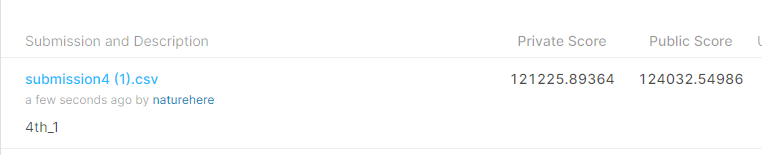

In [ ]:
# Í≥ºÏ†ÅÌï©ÏùÄ ÏïÑÎãêÍπå...n_estimatorsÎ•º 100ÏúºÎ°ú Ìï¥Î≥¥Ïûê.

In [170]:
gboost = GradientBoostingRegressor(max_depth=10, n_estimators=100,random_state=random_state)
#xgboost = xgb.XGBRegressor(max_depth=10, n_estimators=100,random_state=random_state)
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=100,random_state=random_state)
rdforest = RandomForestRegressor(max_depth=10, n_estimators=100,random_state=random_state)
y_pred = AveragingBlending(models, train, y, test)

In [171]:
prediction = np.expm1(y_pred)

In [172]:
submission['price'] = prediction
submission.head()

id         price
0  15035  4.829322e+05
1  15036  4.754704e+05
2  15037  1.326488e+06
3  15038  3.021246e+05
4  15039  3.304399e+05

In [173]:
my_submission_path = join(data_dir, 'submission5.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission5.csv


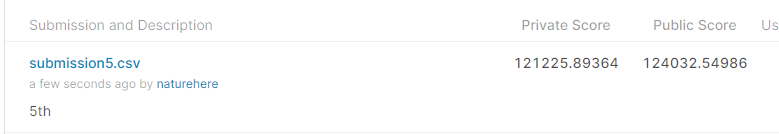


In [174]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=200,random_state=random_state)
lightgbm.fit(train, y)

LGBMRegressor(max_depth=10, n_estimators=200, random_state=2020)

In [177]:
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()

id         price
0  15035  5.024975e+05
1  15036  4.718326e+05
2  15037  1.359938e+06
3  15038  3.050260e+05
4  15039  3.346215e+05

In [178]:
my_submission_path = join(data_dir, 'submission6.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission6.csv


ÏïûÏÑ† Í∑∏Î¶¨ÎìúÏÑúÏπòÏóêÏÑú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÎçò, lgbm Î™®Îç∏Îßå ÏÇ¨Ïö©Ìï¥Î≥¥ÏïòÎã§.
11Îßå2Ï≤ú
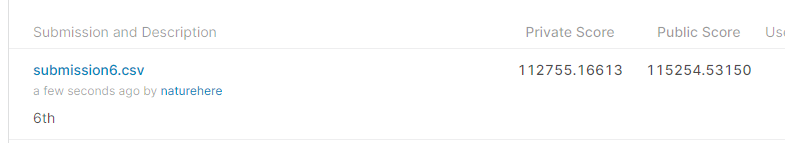

In [179]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=300,random_state=random_state)
lightgbm.fit(train, y)

LGBMRegressor(max_depth=10, n_estimators=300, random_state=2020)

In [180]:
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()

id         price
0  15035  5.175211e+05
1  15036  4.769533e+05
2  15037  1.326717e+06
3  15038  3.044025e+05
4  15039  3.342625e+05

In [181]:
my_submission_path = join(data_dir, 'submission7.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission7.csv


ÏïûÏÑ† Í∑∏Î¶¨ÎìúÏÑúÏπòÏóêÏÑú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÎçò, lgbm Î™®Îç∏Îßå ÏÇ¨Ïö©Ìï¥Î≥¥ÏïòÎã§. 11Îßå
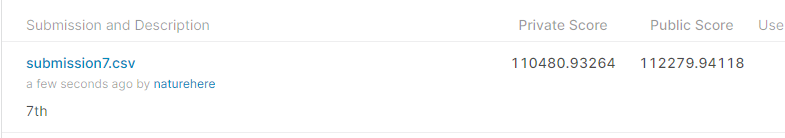

In [182]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=400,random_state=random_state)
lightgbm.fit(train, y)
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()
my_submission_path = join(data_dir, 'submission8.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission8.csv


ÏïûÏÑ† Í∑∏Î¶¨ÎìúÏÑúÏπòÏóêÏÑú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÎçò, lgbm Î™®Îç∏Îßå ÏÇ¨Ïö©Ìï¥Î≥¥ÏïòÎã§. 11Îßå
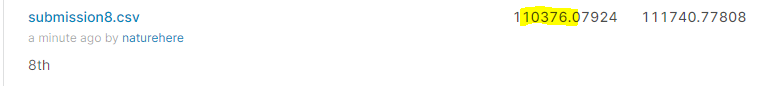

In [183]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=600,random_state=random_state)
lightgbm.fit(train, y)
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()
my_submission_path = join(data_dir, 'submission9.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission9.csv


ÏïûÏÑ† Í∑∏Î¶¨ÎìúÏÑúÏπòÏóêÏÑú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÎçò, lgbm Î™®Îç∏Îßå ÏÇ¨Ïö©Ìï¥Î≥¥ÏïòÎã§. 10Îßå 9Ï≤ú
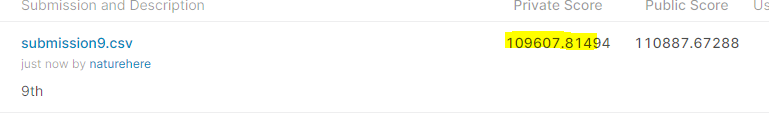

In [184]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=800,random_state=random_state)
lightgbm.fit(train, y)
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()
my_submission_path = join(data_dir, 'submission10.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission10.csv


In [186]:
lightgbm = lgb.LGBMRegressor(max_depth=10, n_estimators=1200,random_state=random_state)
lightgbm.fit(train, y)
y_pred = lightgbm.predict(test)
prediction = np.expm1(y_pred)
submission['price'] = prediction
submission.head()
my_submission_path = join(data_dir, 'submission11.csv')
submission.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission11.csv


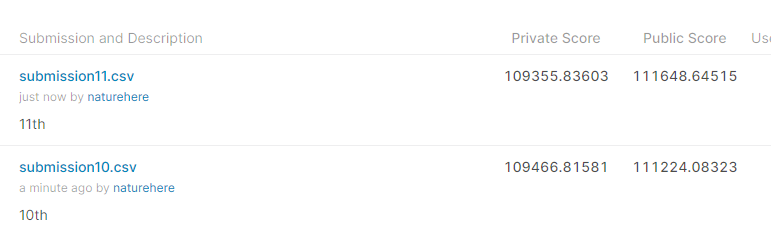

# ÌöåÍ≥†
- Ïñ¥Î†§Ïõ†Îçò Ï†ê : EDAÏôÄ ÌîºÏ≤òÏóîÏßÄÎãàÏñ¥ÎßÅÏù¥ ÏïÑÏßÅÍπåÏßÄ ÎÑàÎ¨¥ÎÇòÎèÑ Ïñ¥Î†µÍ≤å ÎäêÍª¥ÏßÑÎã§. ÎßéÏùÄ ÌÜ†Ïù¥Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Î∞òÎ≥µÏó∞ÏäµÍ≥º Ï†ÅÏ†àÌïú ÏÉÅÌô©Ïóê Ï†ÅÏ†àÌïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÑ ÏùµÌòÄÏïºÌï† ÌïÑÏöîÏÑ±ÏùÑ ÎäêÎÇÄÎã§.
- ÏïåÏïÑÎÇ∏ Ï†ê : ÏÑ∏Í∞ÄÏßÄ Î™®Îç∏Ïóê ÎåÄÌï¥ Í∑∏Î¶¨Îìú ÏÑúÏπòÌïòÍ≥†, Í∞ÅÎ™®Îç∏ÏóêÏÑú Í∞ÄÏû•Ï¢ãÏùÄ Ï†êÏàòÎ•º Î∞õÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î°ú Î∏îÎ†åÎî© ÌïòÏòÄÎã§. Í∑∏Îü¨ÎÇò Ïä§ÏΩîÏñ¥Îäî Ïò§ÌûàÎ†§ Ï¶ùÍ∞ÄÌïòÏó¨ Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÏßÄ ÏïäÏïòÎã§. Î∏îÎ†åÎî©Ïù¥ Îä•ÏÇ¨Îäî ÏïÑÎãàÎùºÍ≥† ÏÉùÍ∞ÅÌïúÎã§.Í∑∏ÎûòÏÑú Í∞ÄÏû• ÏÑ±Îä•Ïù¥ ÏûòÎÇòÏò® lgbmÎ™®Îç∏Ïùò  n_estimators ÌååÎùºÎØ∏ÌÑ∞Îßå Ï¶ùÍ∞ÄÏãúÏºúÍ∞ÄÎ©∞ ÌÖåÏä§Ìä∏ Ìï¥Î≥¥ÏïòÎã§. 200, 300, 400, 600, ÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎ©∞ Ïä§ÏΩîÏñ¥Î•º Î≥¥ÏïòÎäîÎç∞ Ï†êÏ†ê Ïä§ÏΩîÏñ¥Í∞Ä Ï¢ãÏïÑÏ†∏ÏÑú ÏµúÏ¢Ö 1Îßå 9Ï≤úÏùÑ ÏñªÏóàÎã§. Í∑∏Î¶¨Îìú ÏÑúÏπò Îã®Í≥ÑÏóêÏÑú max_depthÎäî 10Í≥º 20 Î™®Îëê ÏãúÎèÑ ÌñàÎäîÎç∞ 20ÏóêÏÑú ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ Î≥¥Ïó¨Ï£ºÏßÄ ÏïäÏïÑÏÑú Îçî ÏãúÎèÑ ÌïòÏßÄ ÏïäÏïòÎã§.
- ÏãúÎèÑÌïú Í≤ÉÎì§ : LMSÏóê ÎÇòÏò®Îç∞Î°ú Ìé∏Ìñ•Ïù¥ ÌÅ∞ Ïª¥ÎüºÏùÑ log Ïä§ÏºÄÏùºÎßÅ ÌïòÏòÄÍ≥†, ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞Î•º intÎ°ú ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï†Ïàò ÏûàÍ≤å ÌñàÎã§. 3Í∞ÄÏßÄ Î™®Îç∏Ïóê ÎåÄÌï¥ÏÑú Í∑∏Î¶¨Îìú ÏÑúÏπòÌïòÏòÄÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º  ÌèâÍ∑†Î∏îÎ†åÎî©ÌïòÏòÄÎã§. Í∞úÎ≥ÑÎ™®Îç∏Î°ú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÎçòÎ™®Îç∏Ïùò  n_estimators Í∞íÏùÑ Ï¶ùÍ∞ÄÌïòÎ©∞ ÌïôÏäµÌïú Î™®Îç∏Ïùò Ïä§ÏΩîÏñ¥ Î≥ÄÌôîÎ•º Î≥¥ÏïòÎçîÎãà Ï†êÏ∞® Ïä§ÏΩîÏñ¥Í∞Ä Ï¢ãÏïÑÏ°åÎã§.

- ÏûêÍ∏∞ Îã§Ïßê : EDAÏôÄ ÌîºÏ≤òÏóîÏßÄÎãàÏñ¥ÎßÅÏïÑ ÏïÑÏßÅ ÎßéÏù¥ Ïñ¥Î†µÍ≤å ÎäêÍª¥ÏßÑÎã§. ÎçîÎßéÏùÄ Í≥µÎ∂ÄÏôÄ Ïã§ÏäµÏùÑ Ìï¥ÏïºÌïúÎã§. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú ÌïôÏäµÍ≥º Ïù¥Ìï¥Í∞Ä Îçî ÌïÑÏöîÌïòÎã§. Í∑∏Î†áÍ≤å Ìï¥ÏÑú Í∞Å ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Í∞ñÏùÄ ÏùòÎØ∏ÏôÄ Îç∞Ïù¥ÌÑ∞Ïóê Í∏∞Î∞òÌïòÏó¨ ÌäúÎãùÍ≥º Í∑∏ Ìï¥ÏÑùÏùÑ ÎÇºÏàò ÏûàÎèÑÎ°ù ÎÖ∏Î†•Ìï¥ÏïºÍ≤†Îã§.